# UNDERSTANDING THE DATA AND THE PROBLEM STATEMENT


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('TASK.csv')

In [3]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [4]:
df.shape

(500, 450)

## This dataset consists of 500 corn samples, each described by 448 numerical features and an identifier column (hsi_id). The primary objective is to predict vomitoxin levels (DON concentration in ppb) using spectral reflectance data.

### Reflectance data" refers to measurements of how much light is reflected off the surface of those samples across different wavelengths

## Checking if the data is already normalized or standardized because it is appearing to be in some kind of a range

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


### As we can see Standardization (Z-score) centers the data around a mean of 0. These means are clearly not centered around 0 but the data is likely scaled to a range, but not a typical 0-1 range. Therefore the data has likely been preprocessed, but not using standard min/max normalization, or z-score standardization

# 1. Data Exploration and Preprocessing

In [6]:
#CHECKING FOR NULL VALUES

In [7]:
null_counts = df.isnull().sum()
print(null_counts)

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [8]:
#CHECKING FOR OUTLIERS IN SPECTRAL DATA AND TARGET FEATURE

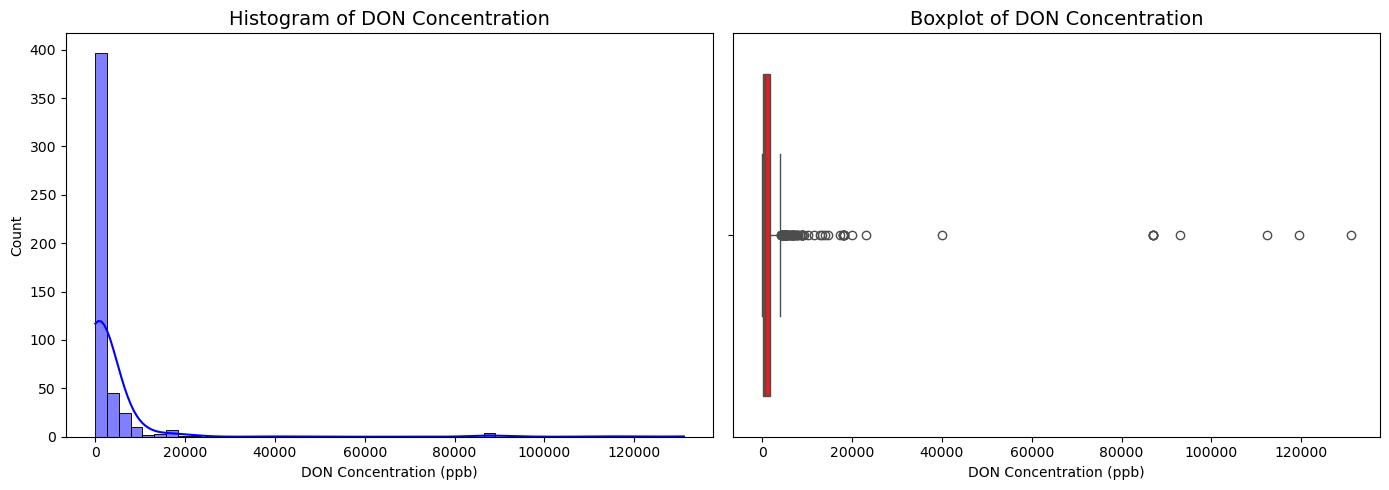

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(df["vomitoxin_ppb"], bins=50, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Histogram of DON Concentration", fontsize=14)
axes[0].set_xlabel("DON Concentration (ppb)")

# Boxplot
sns.boxplot(x=df["vomitoxin_ppb"], ax=axes[1], color="red")
axes[1].set_title("Boxplot of DON Concentration", fontsize=14)
axes[1].set_xlabel("DON Concentration (ppb)")

plt.tight_layout()
plt.show()

## As we can see the Distribution of Target Feature is highly skewed

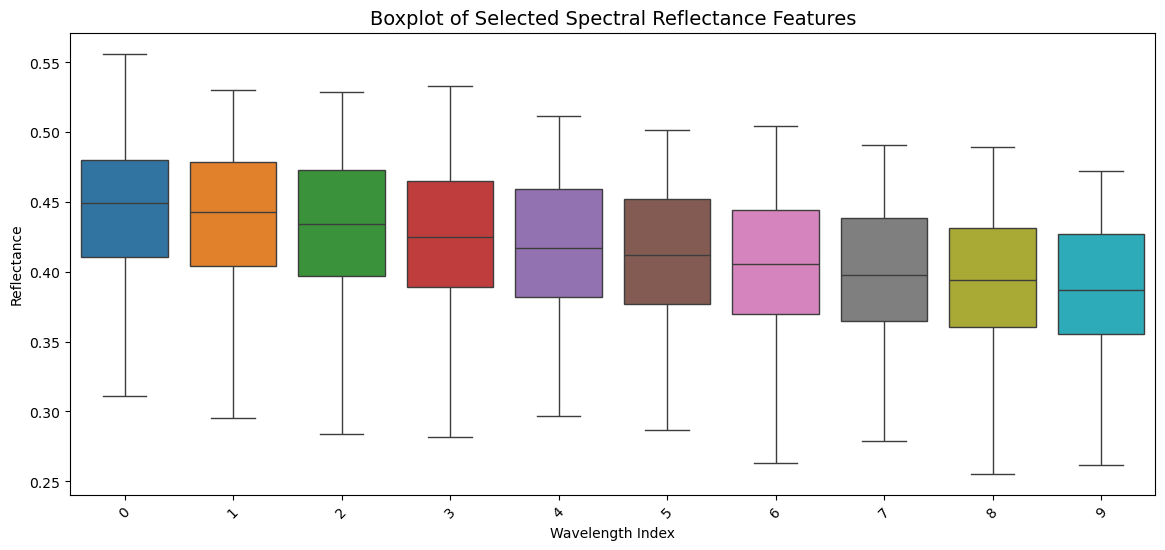

In [10]:
selected_wavelengths = df.columns[1:11]  #Visualizing all 448 columns is not practical we will work our way through

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[selected_wavelengths])
plt.xticks(rotation=45)
plt.title("Boxplot of Selected Spectral Reflectance Features", fontsize=14)
plt.xlabel("Wavelength Index")
plt.ylabel("Reflectance")
plt.show()


## As we can see for the first 10 numerical features outliers are not detected however we will check for the remaning 438 numeric features as well by using IQR

In [11]:
Q1 = df.iloc[:, 1:-1].quantile(0.25)
Q3 = df.iloc[:, 1:-1].quantile(0.75)
IQR = Q3 - Q1
outlier_counts = ((df.iloc[:, 1:-1] < (Q1 - 1.5 * IQR)) | (df.iloc[:, 1:-1] > (Q3 + 1.5 * IQR))).sum()
print(outlier_counts[outlier_counts > 0])

15      2
17      2
19      2
20      1
21      1
       ..
443     9
444    11
445    11
446    10
447    13
Length: 428, dtype: int64


### This shows the number of outliers detected per spectral band (columns 15, 17, 19, ..., 447).

### We will deal with all these outliers in preprocessing

In [12]:
#Lets check if there is any inconsistency in Format of the data 

In [13]:
print(df.dtypes)


hsi_id            object
0                float64
1                float64
2                float64
3                float64
                  ...   
444              float64
445              float64
446              float64
447              float64
vomitoxin_ppb    float64
Length: 450, dtype: object


In [14]:
#Everything is perfect

## Lets check  Correlation Between Spectral Features & DON Levels

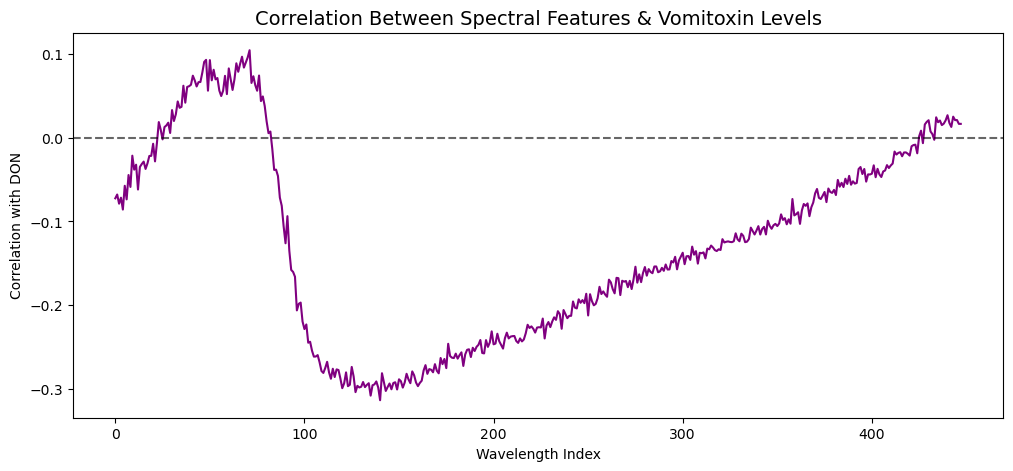

In [15]:
corr_values = df.iloc[:, 1:-1].corrwith(df["vomitoxin_ppb"])

# Plot correlation
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(len(corr_values)), y=corr_values, color="purple")
plt.title("Correlation Between Spectral Features & Vomitoxin Levels", fontsize=14)
plt.xlabel("Wavelength Index")
plt.ylabel("Correlation with DON")
plt.axhline(0, color="black", linestyle="--", alpha=0.6)
plt.show()


### Correlation Patterns:
#### Initial Positive Correlation: At the beginning of the spectrum (lower wavelength indices), there's a positive correlation, indicating that higher reflectance at those wavelengths is associated with higher vomitoxin levels.
#### Strong Negative Correlation: There's a sharp drop and a strong negative correlation in the middle range of the spectrum. This suggests that higher reflectance at these wavelengths is associated with lower vomitoxin levels.
#### Return to Near Zero: As the wavelength index increases, the correlation gradually returns to near zero or slightly positive values.

### This visualization also shows that the Data is non linear which will help out in picking the model 

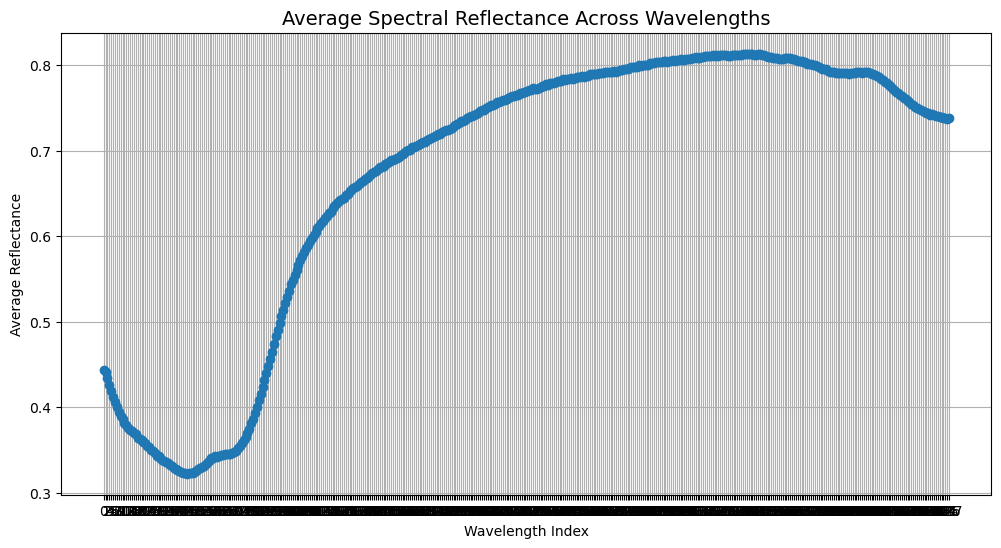

In [16]:
#Line Plot: Average Reflectance Across Wavelengths
spectral_columns = df.columns[1:-1]  
mean_reflectance = df[spectral_columns].mean()
plt.figure(figsize=(12, 6))
plt.plot(mean_reflectance.index, mean_reflectance.values, marker='o', linestyle='-')
plt.xlabel("Wavelength Index")
plt.ylabel("Average Reflectance")
plt.title("Average Spectral Reflectance Across Wavelengths", fontsize=14)
plt.grid()
plt.show()

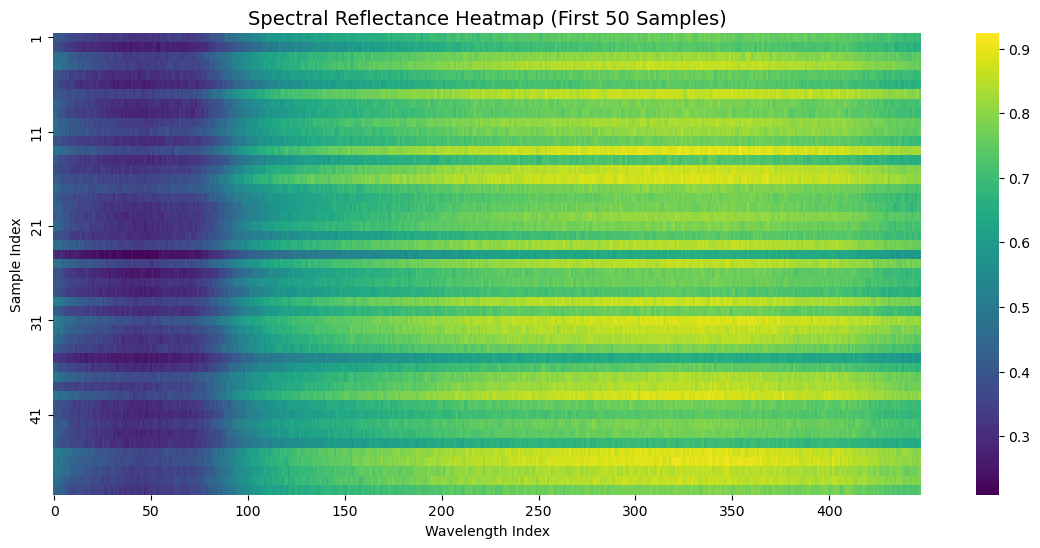

In [17]:
#Line Plot: Average Reflectance Across Wavelengths we will take 50 features to avoid overload our visualization
sample_subset = df[spectral_columns].iloc[1:50]
plt.figure(figsize=(14, 6))
sns.heatmap(sample_subset, cmap="viridis", xticklabels=50, yticklabels=10)
plt.xlabel("Wavelength Index")
plt.ylabel("Sample Index")
plt.title("Spectral Reflectance Heatmap (First 50 Samples)", fontsize=14)
plt.show()

### Color Intensity (Reflectance): The color intensity in each cell represents the reflectance value for that particular sample at that particular wavelength.
#### Brighter colors (towards yellow) indicate higher reflectance.
#### Darker colors (towards purple) indicate lower reflectance.


# Dealing with outliers and Standardizing the data

## We will not go with normalization because itwould further compress the data into the 0 to 1 range. This compression could potentially lead to a loss of information.

In [18]:
#lets check the outliers once again starting with Target feature
target_col = "vomitoxin_ppb"
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)]
print(f"Number of outliers in target feature: {outliers.shape[0]}")


Number of outliers in target feature: 80


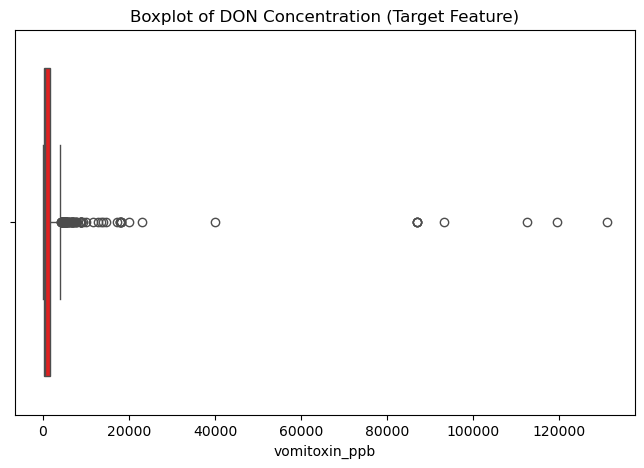

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[target_col], color="red")
plt.title("Boxplot of DON Concentration (Target Feature)")
plt.show()

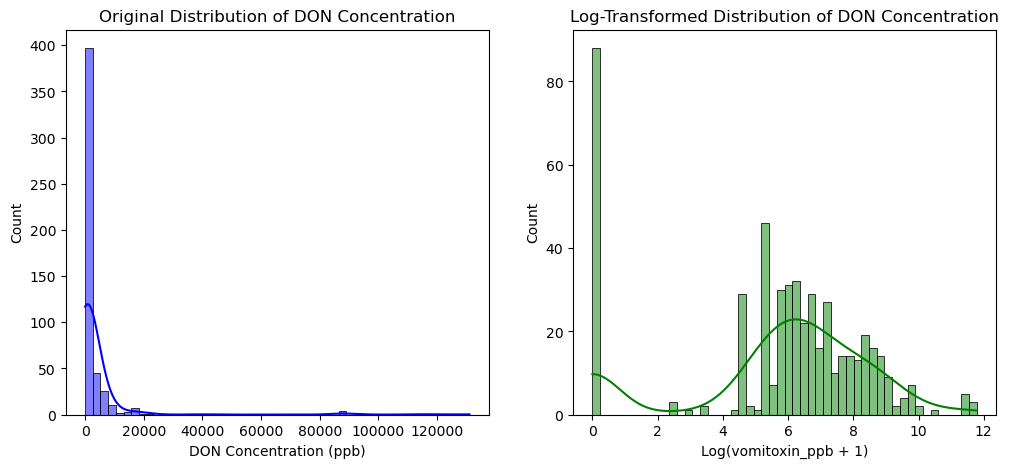

In [20]:
#We can simply remove the outliers but it can also lead to loss of information if some values are valid so to keep the information we will use Log transformation
import numpy as np
df["DON_Log"] = np.log1p(df["vomitoxin_ppb"])
plt.figure(figsize=(12, 5))
# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(df["vomitoxin_ppb"], bins=50, kde=True, color="blue")
plt.title("Original Distribution of DON Concentration")
plt.xlabel("DON Concentration (ppb)")
# Transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df["DON_Log"], bins=50, kde=True, color="green")
plt.title("Log-Transformed Distribution of DON Concentration")
plt.xlabel("Log(vomitoxin_ppb + 1)")
plt.show()

                 0             1             2             3             4  \
mean -1.147527e-15 -1.945111e-15  7.549517e-16  1.158185e-15  1.950440e-15   
std   1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   

                 5             6             7             8             9  \
mean -2.700062e-16 -3.215206e-16  1.437073e-15  8.508749e-16 -6.128431e-16   
std   1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   

      ...           439           440           441           442  \
mean  ...  1.517009e-15  6.927792e-16 -9.947598e-17 -3.854694e-16   
std   ...  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   

               443           444           445           446           447  \
mean  1.062261e-15 -1.231015e-15 -1.062261e-15 -5.169198e-16 -1.397993e-15   
std   1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   

      vomitoxin_ppb  
mean   2.131628e-17  
std    1.001002e+00  

[2 rows x 449 column

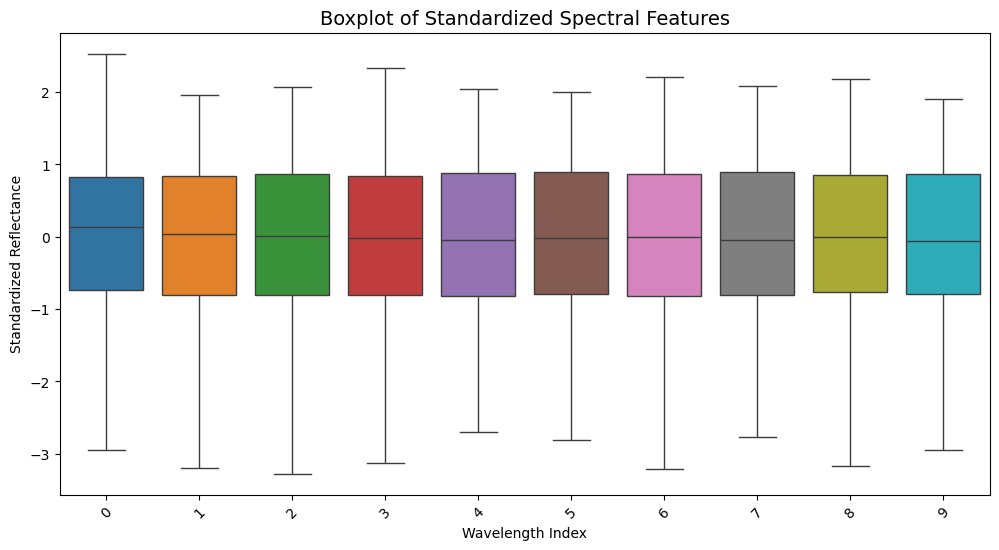

In [21]:
from sklearn.preprocessing import StandardScaler
spectral_features = df.columns[1:-1]
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[spectral_features] = scaler.fit_transform(df[spectral_features])

# Checking mean and std after standardization
mean_std = df_standardized[spectral_features].agg(["mean", "std"])
print(mean_std)

# Visualizing the standardized data distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standardized[spectral_features].iloc[:, :10])  # First 10 columns
plt.xticks(rotation=45)
plt.title("Boxplot of Standardized Spectral Features", fontsize=14)
plt.xlabel("Wavelength Index")
plt.ylabel("Standardized Reflectance")
plt.show()

# 2. Dimensionality Reduction

### We will apply PCA (Principal Component Analysis(PCA) and use t-SNE for visualization.(Applying log transformation for the Spectral features as well)


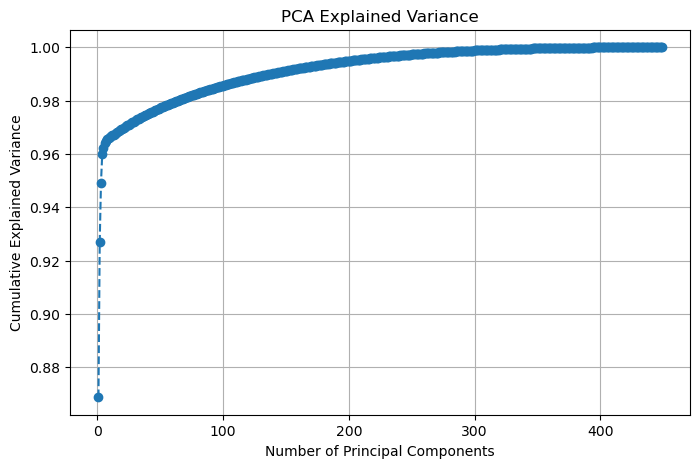

Number of components to retain 95% variance: 4


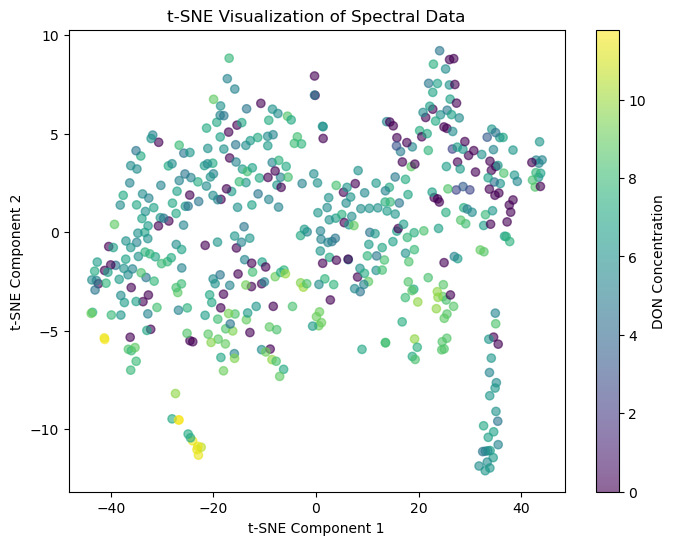

In [22]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

spectral_features = df.iloc[:, 1:-1]  

X_log = np.log1p(spectral_features)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

pca = PCA()
pca.fit(X_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

# Find Number of Components Explaining 95% Variance
num_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {num_components}")

# Apply PCA with Optimal Components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# t-SNE for Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Scatter Plot for t-SNE
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df.iloc[:,-1], cmap='viridis', alpha=0.6)
plt.colorbar(label="DON Concentration")
plt.title("t-SNE Visualization of Spectral Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show() 

## Typically, we'd expect to retain more components for such high-dimensional data but for the given data all 448 numerical features are highly coorelated as we saw when we were checking coorelation of the features with target feature

# For the Model training and Evaluation we will try CNN , LTSM , Random forest and we will keep the track of the Model's metrics using Expirement Tracking from Ml flow i will not upload the practice and expirement codes here A log file and video a UI of the comparision will be uploaded along with the files in github and here only the best fit model will be used

In [23]:
import numpy as np
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
# Assuming your DataFrame is called 'df'
# Select spectral features (corrected)
df = pd.read_csv('TASK2')
spectral_features = df.columns[1:-1]

# Use original spectral data or PCA data
X = df[spectral_features].values  # Use original spectral data
# X = X_pca  # Use PCA transformed data

Y = df.iloc[:, -1].values  # Target variable (vomitoxin_ppb)

# Standardizing target (optional but often helpful)
scaler_y = StandardScaler()
Y = scaler_y.fit_transform(Y.reshape(-1, 1))

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Define and Train Random Forest Model
with mlflow.start_run(run_name="Random_Forest_Experiment"):
    rf_model = RandomForestRegressor(
        n_estimators=100, random_state=42
    )  # You can tune hyperparameters here
    rf_model.fit(X_train, Y_train)

    # Predictions
    Y_pred = rf_model.predict(X_test)

    # Inverse transform predictions and test values
    Y_pred = scaler_y.inverse_transform(Y_pred.reshape(-1, 1))
    Y_test = scaler_y.inverse_transform(Y_test)

    # Evaluation metrics
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R^2 Score: {r2}")

    # Log metrics
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)
    
    # Log model
    mlflow.sklearn.log_model(rf_model, "Random_Forest_Experiment")

print("Random Forest experiment with MLflow tracking completed.")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE: 3783.5175000000004
MSE: 133804312.021421
R^2 Score: 0.5213292958912492


2025/03/10 23:03:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest experiment with MLflow tracking completed.


In [24]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
